In [2]:
import numpy as np
import networkx as nx

from utils.graph import *

from matplotlib import pyplot as plt
from matplotlib import rcParams, rc
rcParams['figure.dpi'] = 500
rc('text', usetex=True)
rc('font', family='serif')

In [9]:
# g = nx.Graph()

# with open('pantagruel/buses.csv') as f:
#     next(f)
#     for line in f:
#         line = line.split(',')
#         g.add_node(line[0], pos=(line[-2], line[-1]))
# nodes = g.nodes()

# with open('pantagruel/lines.csv') as f:
#     next(f)
#     for line in f:
#         line = line.split(',')
#         g.add_edge(line[0], line[1])

# mask_gen = {n: False for n in nodes()}
# with open('pantagruel/generators.csv') as f:
#     next(f)
#     for line in f:
#         line = line.split(',')
#         mask_gen[line[0]] = True

# nx.set_node_attributes(g, mask_gen, 'mask_gen')

In [10]:
# g = nx.convert_node_labels_to_integers(g)

# pos = [[float(p[0]), float(p[1])] for _, p in nx.get_node_attributes(g, 'pos').items()]
# mask_gen = [b for _, b in nx.get_node_attributes(g, 'mask_gen').items()]
# plot_graph(g, pos, mask_gen)

In [11]:
# UK grid
g = nx.Graph()

num_nodes = 313

mass = np.zeros((num_nodes, ))
power_gen = np.zeros((num_nodes, ))
power_con = np.zeros((num_nodes, ))

phase = np.zeros((num_nodes, ))
dphase = np.zeros((num_nodes, ))

with open('uk_data/bus.txt') as f:
    for line in f:
        line = line.split('\t')[1:]
        n = int(line[0])-1
        g.add_node(n)
        power_con[n] = -float(line[2])*0.01
nodes = g.nodes()

with open('uk_data/line.txt') as f:
    for line in f:
        line = line.split('\t')[1:]
        g.add_edge(int(line[0])-1, int(line[1])-1)

mask_gen = {n: False for n in nodes}
with open('uk_data/gen.txt') as f:
    for line in f:
        line = line.split('\t')[1:]
        n = int(line[0])-1
        mask_gen[n] = True
        power_gen[n] = float(line[1])*0.01

pos = {n: (0, 0) for n in nodes}
n = 0
with open('uk_data/bus_pos.txt') as f:
    for line in f:
        line = line.split('\t')[1:]
        pos[n] = (float(line[0]), float(line[1]))
        n += 1

nx.set_node_attributes(g, mask_gen, 'mask_gen')
nx.set_node_attributes(g, pos, 'pos')

total consumption: -368.896
total genearation: 368.89599999999996


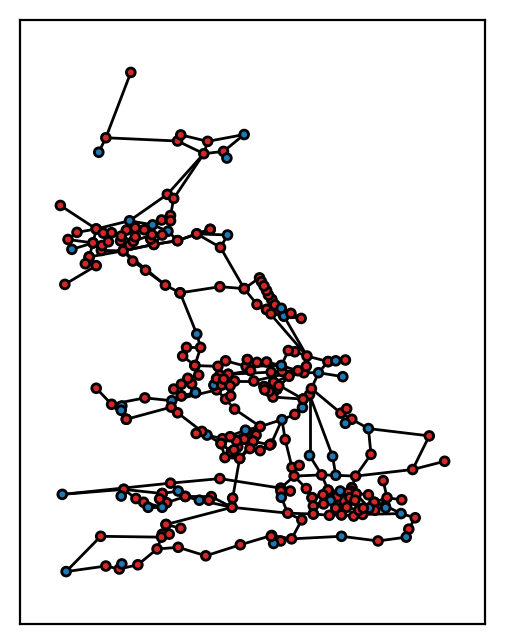

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(3, 4), dpi=200)

pos = [[p[0], p[1]] for _, p in nx.get_node_attributes(g, 'pos').items()]
mask_gen = [b for _, b in nx.get_node_attributes(g, 'mask_gen').items()]
plot_graph(g, pos, mask_gen)
print('total consumption:', np.sum(power_con))
print('total genearation:', np.sum(power_gen))